# Number Recognition Project

All the programs that need to be imported/called upon.

In [23]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential, Model

### Initialization

There are 10 numbers are we are going to train the system to recognize 0 - 9 due to that we initialize the classes to 10, and we will be feeding the images as a 28x28x1 which is why we initialize the input shape. 

In [2]:
classes = 10 #initializing the number of classes we will have
input_shape = (28, 28, 1)

### Split between test and train data

This splits the data between training and testing.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Parameters

This makes sure the data has the correct parameters needed.

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
shift = 0.2

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


ImageDataGenerator tranforms the data we have.

In [6]:
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=shift, height_shift_range=shift)
datagen.fit(x_train)

###  Converting Classes to Binary Matrices

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model

This creates a sequential model that has an input shape of 28x28x1, and has two convolutional layers which have filters that go through the inputs and  create an activation map from it. There are also two maxpooling layers that essentially create downsized feature maps. Also two dropout layers that 'drop' some data to prevent from overfitting.

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        layers.Dense(classes, activation="softmax"),
    ]
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

### Training

The model above is ran using the data that was divided between training and testing. 

In [20]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 20s 47ms/step - loss: 0.3301 - accuracy: 0.9014 - val_loss: 0.0895 - val_accuracy: 0.9753
Epoch 2/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0980 - accuracy: 0.9696 - val_loss: 0.0601 - val_accuracy: 0.9830
Epoch 3/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.0518 - val_accuracy: 0.9850
Epoch 4/20
422/422 [==============================] - 18s 44ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 5/20
422/422 [==============================] - 19s 45ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.0387 - val_accuracy: 0.9890
Epoch 6/20
422/422 [==============================] - 22s 51ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0398 - val_accuracy: 0.9885
Epoch 7/20
422/422 [==============================] - 19s 44ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0384 - val_accuracy:

The accuaracy of the trained model is then evaluated, and graphed. Below and the model is also saved so it can be used later.

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
loss = score[0]*100
acc = score[1]*100
print("Test loss: %.2f" % loss,"%")
print("Test accuracy: %.2f" % acc,"%")

model.save('final_trained_model')

Test loss: 2.55 %
Test accuracy: 99.22 %


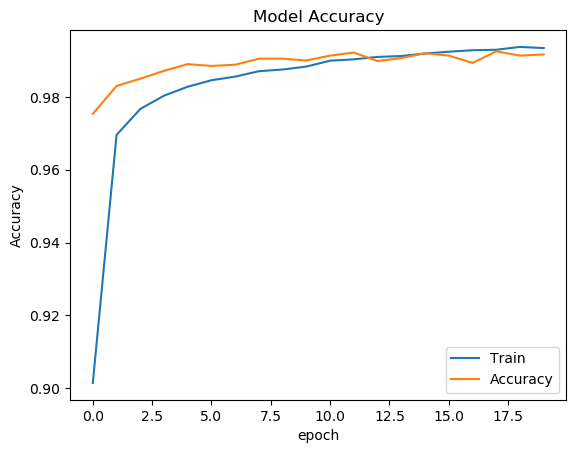

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Accuracy'], loc='lower right')
plt.show()

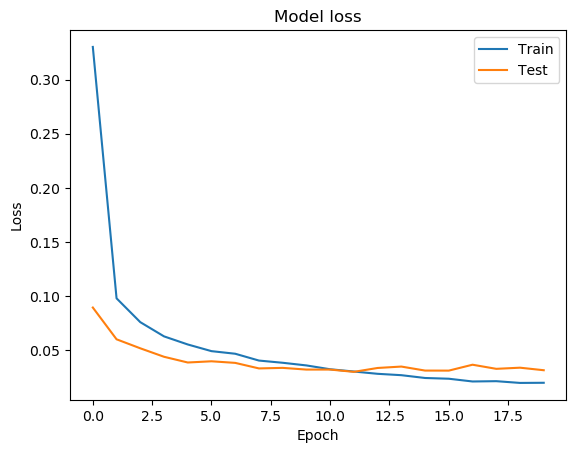

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()